# EDA FARS (Fatality Analysis Reporting System)

### What is this Dataset about?

<p>Data is for automobiles where the right passenger seat was occupied, with one observation for each such passenger. Observations for vehicles where the most harmful event was a fire or explosion or immersion or gas inhalation, or where someone fell or jumped from the vehicle, are omitted. Data is limited to vehicle body types 1 to 19,48,49,61, or 62. This excludes large trucks, pickup trucks, vans and buses. The 2009 and 2010 data does not include information on whether airbags were installed.
</p>

In [37]:
from __future__ import division
#import required modules
import pandas as pd 
from IPython.display import display
import numpy as np
#matplotlib for additional coustomization
from matplotlib import pyplot as plt
%matplotlib inline

#seaborn for plotting and styling
import seaborn as sns
# to supress printing of exponential notation in pandas
pd.options.display.float_format = '{:20,.2f}'.format

In [71]:
#helper functions
def bold(text_to_bold):
    """
    Bolds given string.
    args:todo
    returns:todo
    """
    bold = "\033[1m"
    reset = "\033[0;0m"
    return bold + text_to_bold + reset

def count_plot(column, axis, df, percent):
    total_rows = df.shape[0]
    plt.figure(figsize=(16,8))
    if axis == 'x':
        ax = sns.countplot(x=column, data=df)
    elif axis == 'y':
        ax = sns.countplot(y=column, data=df)
    
    if percent == 'show' and axis != 'y':
        for p in ax.patches:
            height=p.get_height()
            percent = (height*100)/total_rows
            ax.text((p.get_x() + p.get_width()/2), p.get_height()+250, '{:1.2f} %'.format(percent), ha='center')
    
def show_unique(column, df):
    
    print "There are {} unique values in column {}\n".format(str(len(df[column].unique())), column)

## File Structure

In [39]:
data = pd.read_csv('data/FARS.csv')
data = data.drop(labels=['Unnamed: 0'], axis=1)
print "Data shape:"
print "{} Rows x {} Columns".format(str(data.shape[0]), str(data.shape[1]))
data.head(10)

Data shape:
151158 Rows x 17 Columns


,caseid,state,age,airbag,injury,restraint,sex,inimpact,modelyr,airbagAvail,airbagDeploy,Restraint,D_injury,D_airbagAvail,D_airbagDeploy,D_Restraint,year
0,1:1:2,1,20,30,3,1,2,12,1991,no,no,yes,3,no,no,yes,1998
1,1:2:1,1,41,30,2,0,1,2,1987,no,no,no,2,no,no,no,1998
2,1:3:1,1,26,30,3,0,1,4,1983,no,no,no,4,no,no,no,1998
3,1:8:1,1,17,1,4,0,1,11,1997,yes,yes,no,4,yes,yes,no,1998
4,1:10:1,1,19,30,3,0,1,12,1998,no,no,no,4,yes,yes,no,1998
5,1:13:1,1,1,30,4,4,1,3,1991,no,no,yes,3,no,no,yes,1998
6,1:15:1,1,24,1,3,0,1,2,1995,yes,yes,no,3,yes,yes,yes,1998
7,1:19:2,1,50,30,4,3,2,3,1984,no,no,yes,3,no,no,yes,1998
8,1:21:1,1,16,30,4,3,2,12,1991,no,no,yes,3,yes,yes,yes,1998
9,1:23:1,1,53,30,4,0,1,3,1988,no,no,no,4,no,no,no,1998


### Variables Defination

<p>There are total 17 variables present in this data-set, which can be divided in to following categories</p>
<p><b>Vehicle:</b></p>
<ul>
<li><b>caseid</b>: Vehicles ID</li>
<li><b>modelyr</b>: Vehicle's model year</li>
<li><b>inimpact</b>:Initial Impact of accident on vehicle (which car side was colided first).</li>
<li><b>airbag</b>: Type of air bag installed in car for ex. only front airbag</li>
<li><b>restraint</b>: type of seatbelts installed in car for ex. only shoulder seatbelt</li>
</ul>
<p><b>Passanger</b>:</p>
<ul>
<li><b>Age</b>: Passenger's Age</li>
<li><b>sex</b>: Passenger's gender</li>
<li><b>injury</b>: Category of passenger's Injury</li>
<li><b>airbagAvail</b>: Passanger's air bag availability.</li>
<li><b>airbagDeploy</b>: Passangers air bag doployment.</li>
<li><b>Restraint</b>: If passanger was wearnig seatbelt or not.</li>
</ul>
<p><b>Driver</b>:</p>
<ul>

<li><b>D_injury</b>: Driver injury category</li>
<li><b>D_airbagAvail</b>: If air bag was available for driver or not</li>
<li><b>D_airbagDeploy</b>: If air bag was deployed or not</li>
<li><b>D_Restraint</b>: If driver was wearing seatbelt or not</li>
</ul>
<p><b>Other</b>:</p>
<ul>
<li><b>state</b>: US State code where accident happend</li>
<li><b>year</b>: year of accident</li>

</ul>


## Let's explore variables of above categories. 

## Category Vehicle

### inimpact: location code of initial impact


In [65]:
#
totalrows = data.shape[0]
inimpact_df = data[['inimpact']]
show_unique('inimpact', data)
print 'Unique categories in inimpact are following:'

There are 24 unique values in column inimpact

Unique categories in inimpact are following:


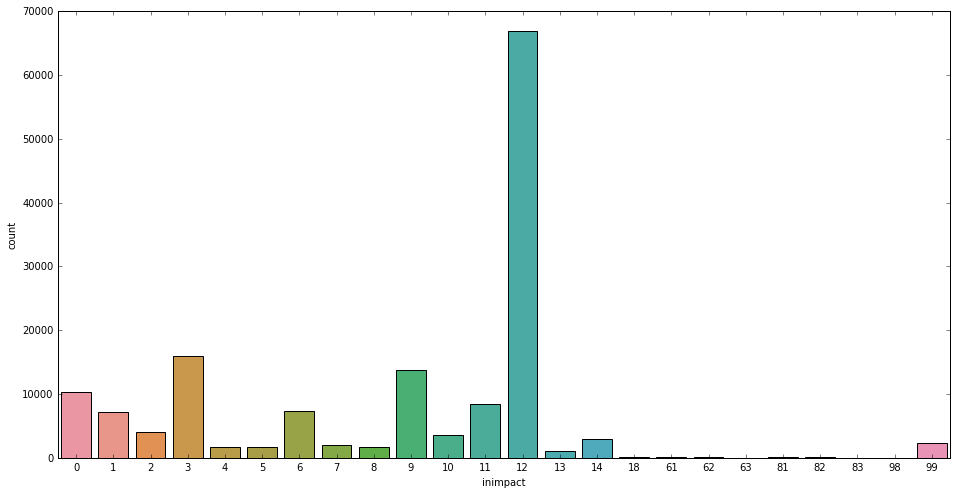

In [41]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x='inimpact', data=inimpact_df)

 We can see that in most of the cases initial point of impact was front side of the car, **12**.
 
Desc | Img
- | -
![alt](img/inimpact.png)|![alt](img/inpact2.png)

### airbag: Type of air bag installed in car for ex. only front airbag

There are 15 unique values in column airbag



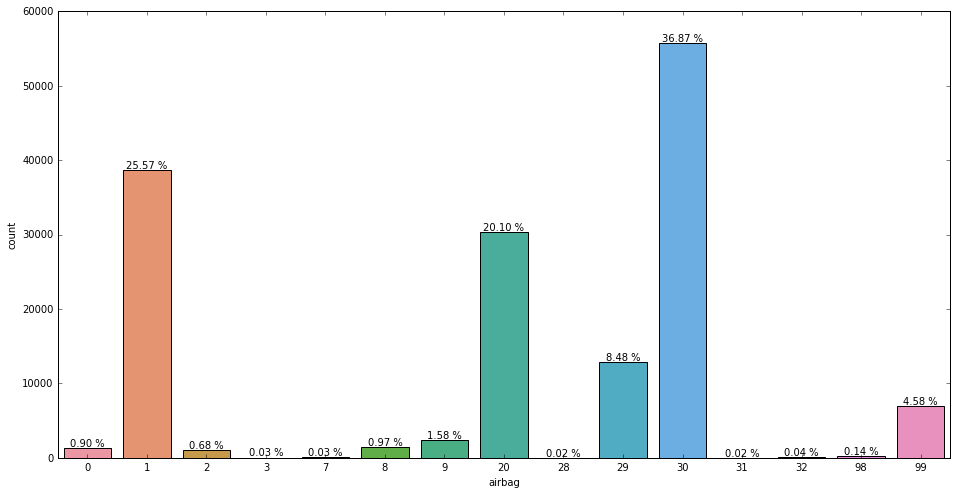

In [66]:
show_unique('airbag', data)
count_plot('airbag', 'x', data, 'show')

Img | Desc
- | -
![alt](img/airbag.png) |

### restraint: type of seatbelts installed in car for ex. only shoulder seatbelt

There are 15 unique values in column restraint



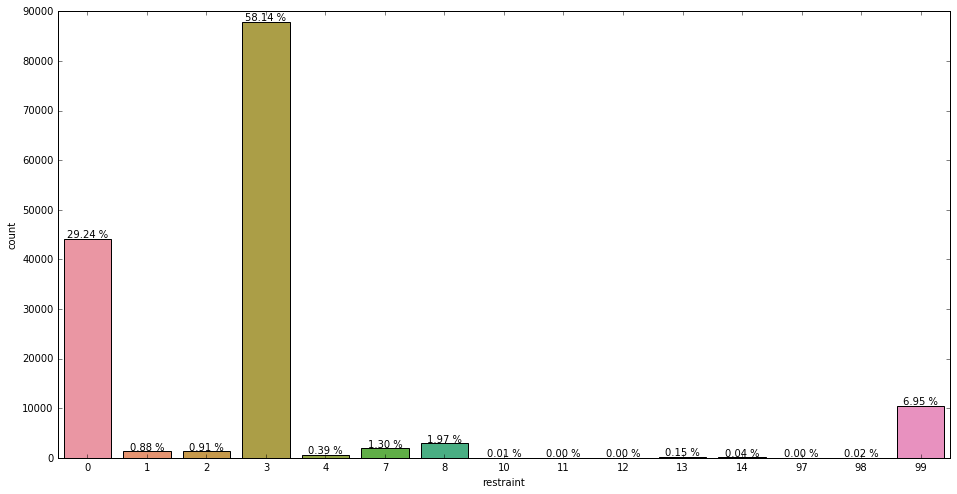

In [68]:
show_unique('restraint', data)
count_plot('restraint', 'x', data, 'show')

Img | Desc
- | -
![alt](img/restraint.png)| **Most of the deaths occoured even if they were using both (Lap and Soulder) seat belts.**

## Category Passenger:

### sex: Passenger's gender

There are 3 unique values in column sex



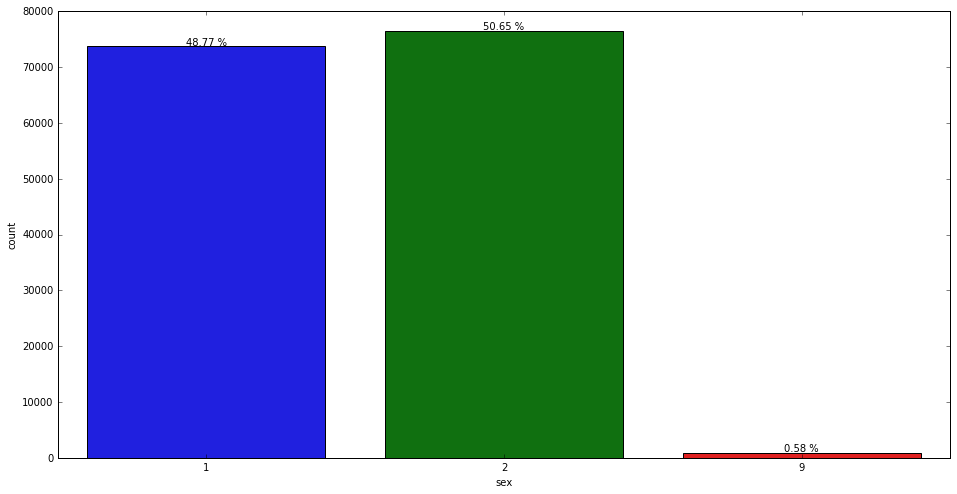

In [69]:
show_unique('sex', data)
count_plot('sex', 'x' , data, 'show')
print "1 is for Male and"

### injury: Category of passenger's Injury

There are 7 unique values in column injury



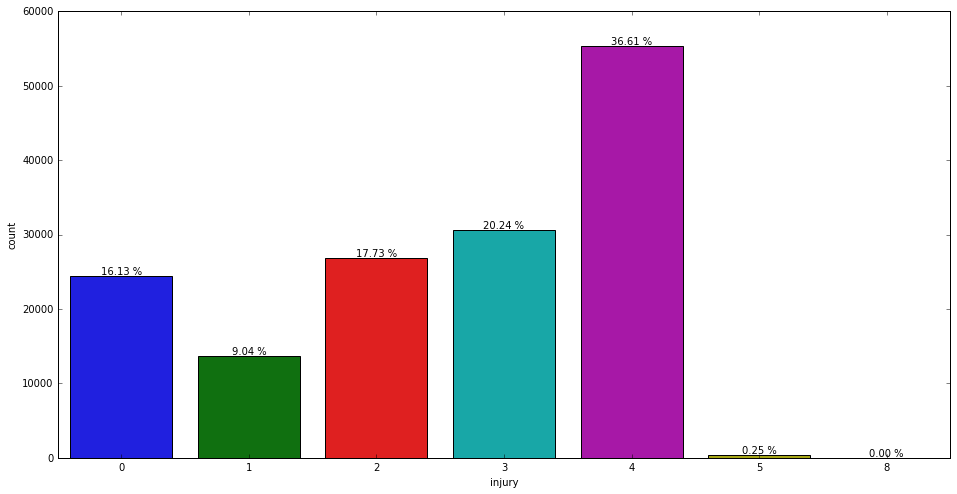

In [70]:
show_unique('injury', data)
count_plot('injury', 'x' , data, 'show')

Most of the deaths in accident were due to Fatal Injury.

Desc | Desc
- | -
![alt](img/injury4.png) |![alt](img/injury1.png) ![alt](img/injury2.png)

### airbagAvail: Passanger's air bag availability 

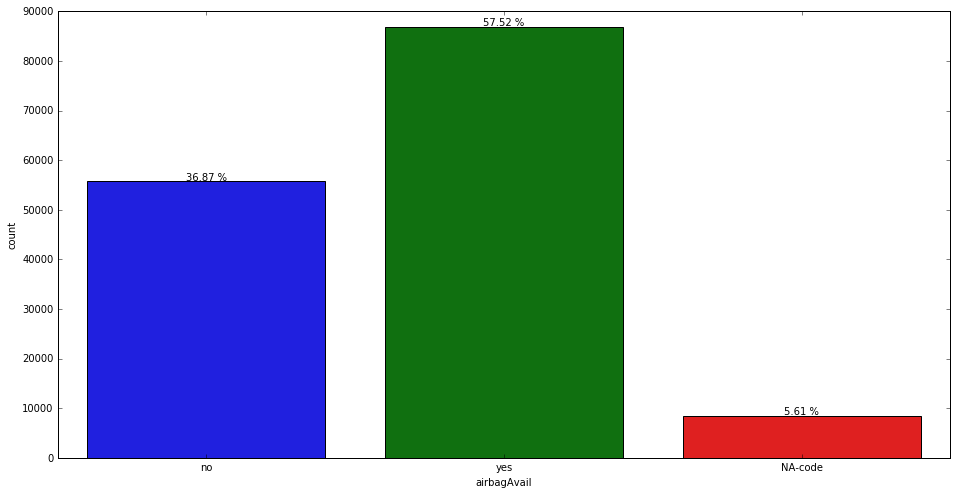

In [44]:
count_plot('airbagAvail','x', data, 'show')

### airbagDeploy: Passangers air bag doployment 

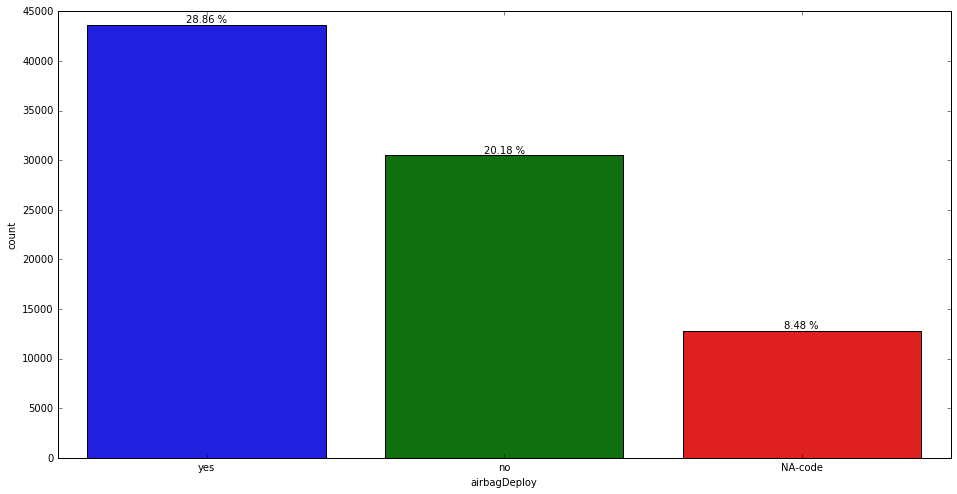

In [45]:
bag_deploy = data[data.airbagAvail == 'yes']
count_plot('airbagDeploy', 'x', bag_deploy, 'show')

### Restraint: If passanger was wearnig seatbelt or not 

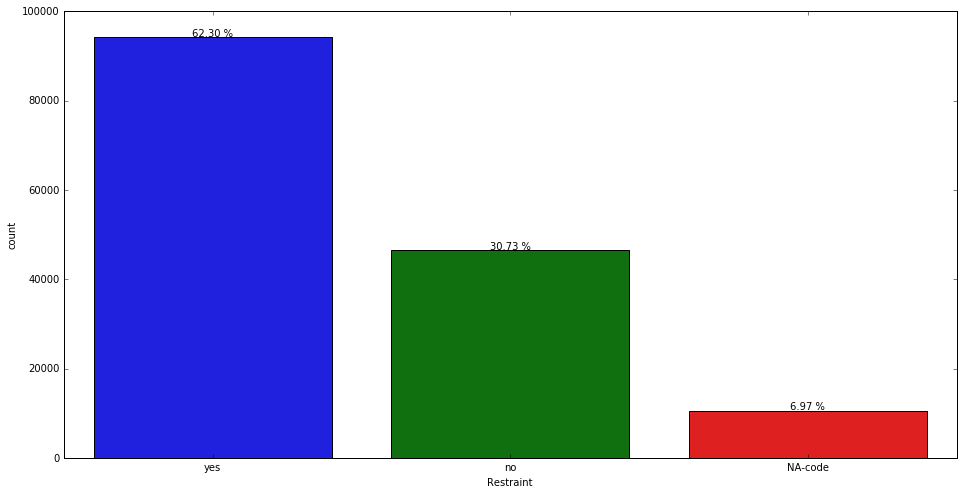

In [46]:
count_plot('Restraint', 'x', data, 'show')

## Category Driver

### D_injury: Driver injury category 

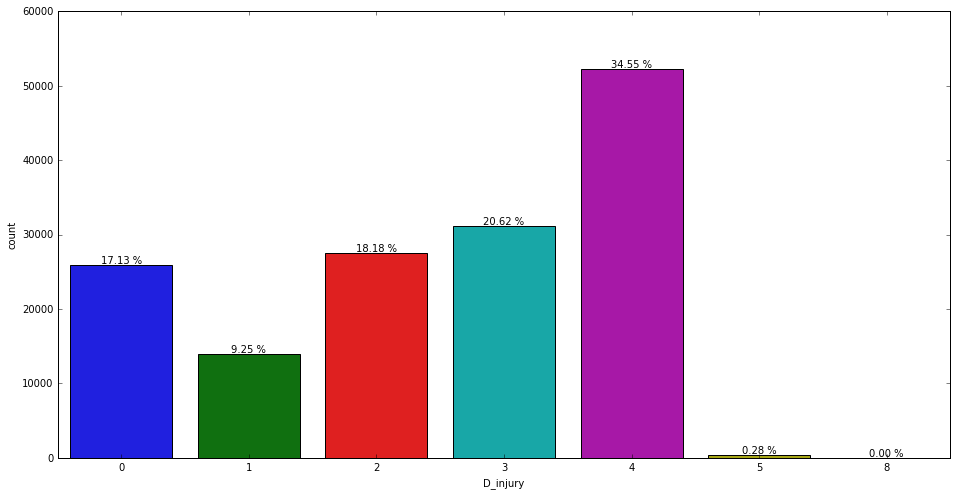

In [47]:
count_plot('D_injury', 'x', data, 'show')

### D_airbagAvail: If air bag was available for driver or not 

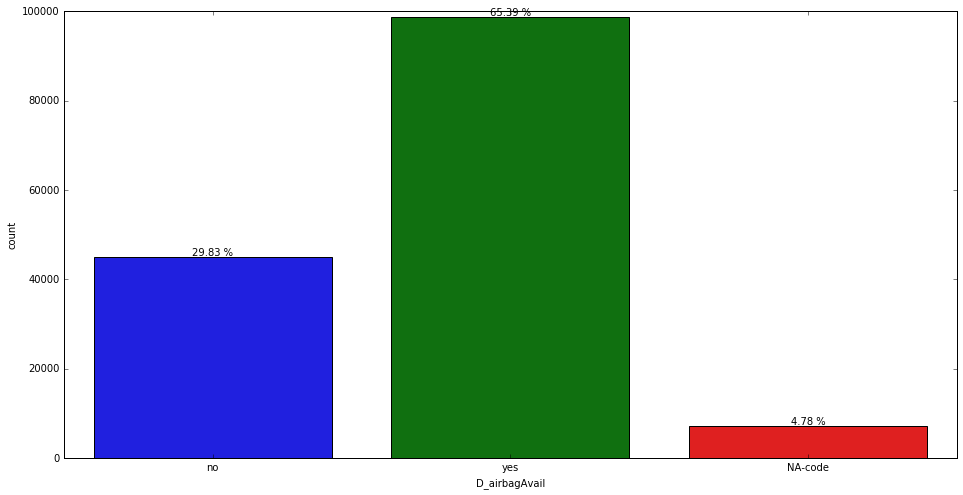

In [48]:
count_plot('D_airbagAvail', 'x', data, 'show')

### D_airbagDeploy: If air bag was available for driver or not D_airbagAvail: If air bag was available for driver or not

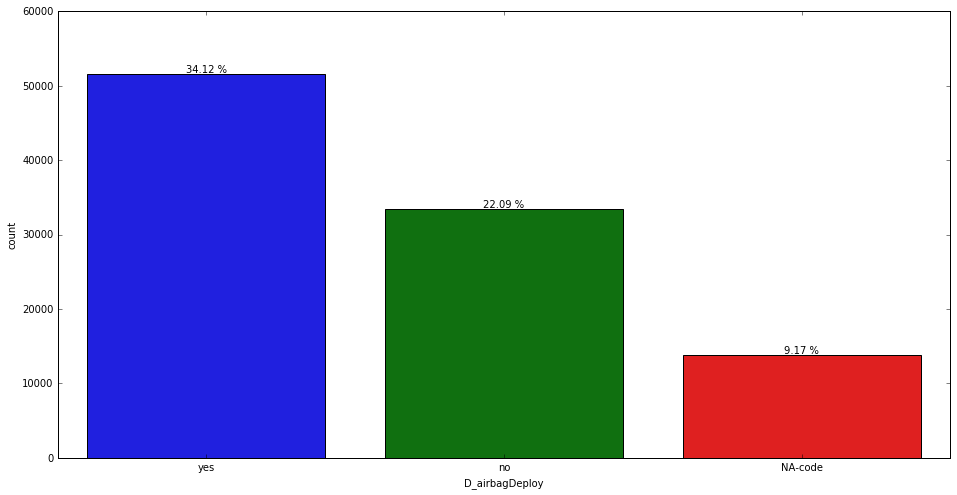

In [49]:
bag_deploy = data[data.D_airbagAvail == 'yes']
count_plot('D_airbagDeploy', 'x', bag_deploy, 'show')

### D_Restraint: If driver was wearing seatbelt or not 

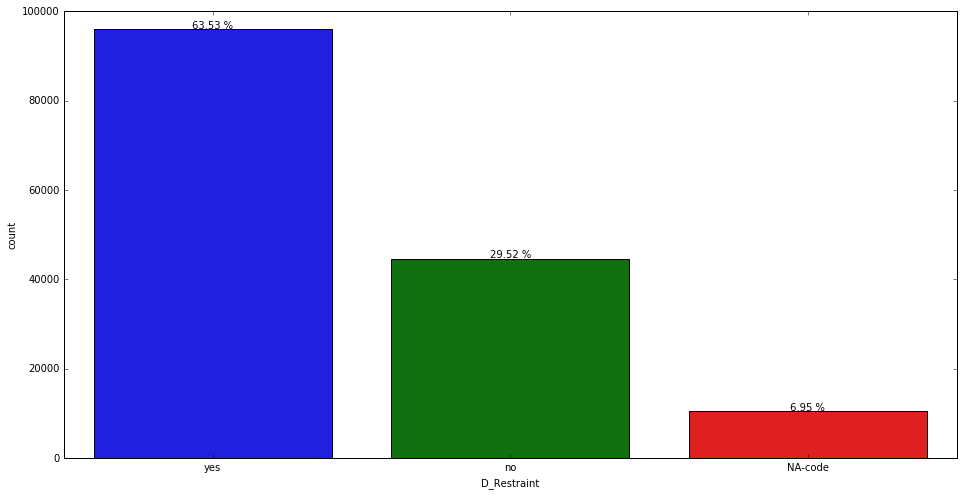

In [50]:
count_plot('D_Restraint', 'x', data, 'show')

### Category Other:

### year

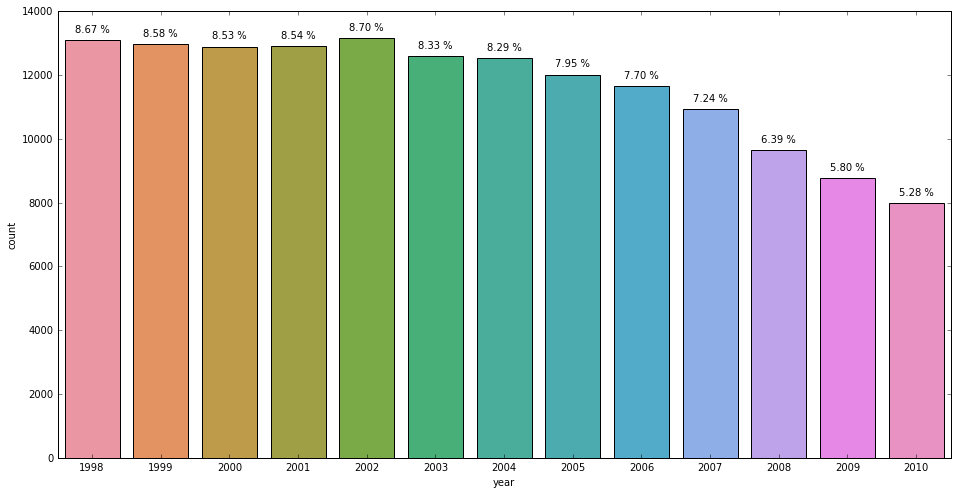

In [51]:
count_plot('year', 'x', data, 'show')

### state: state code of USA where accident happend

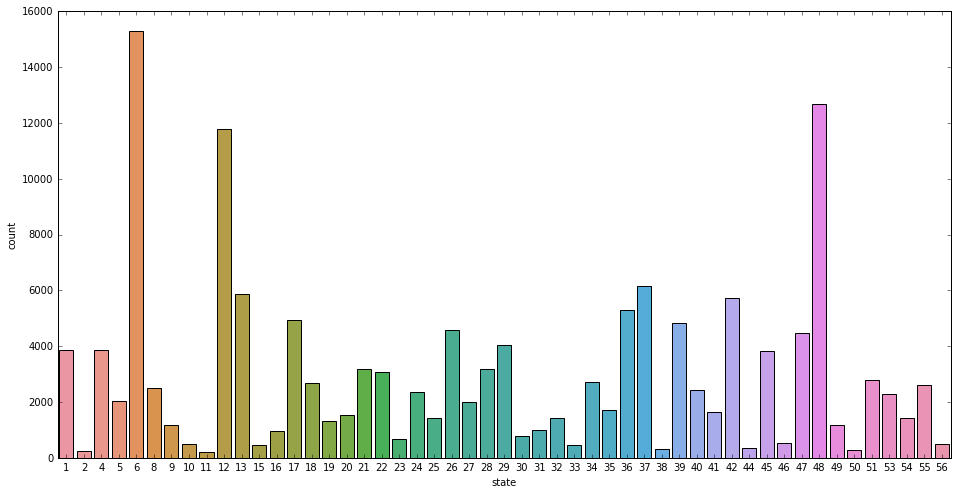

In [52]:
count_plot('state', 'x', data, 'notshow')